Enter the location description (e.g., Kyiv, Shcherbakovskaya St.): 1
Enter the pollution name (e.g., PM2.5): 1
Enter the y-axis label (e.g., PM2.5 Index): 1


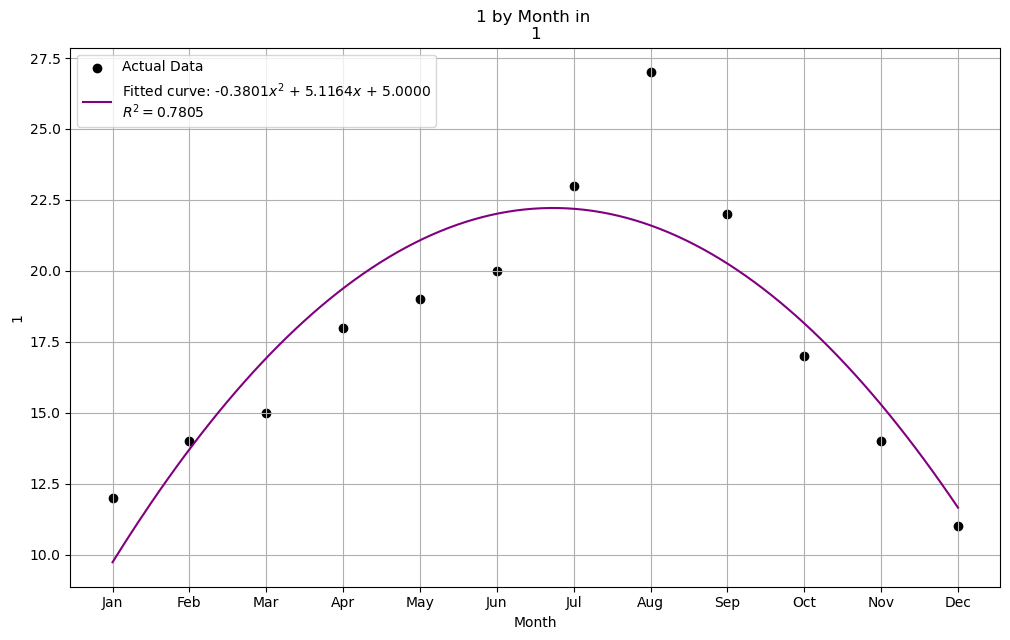

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for handling CSV
from numpy.polynomial.polynomial import Polynomial

# User inputs for the descriptive elements of the plot
description = input("Enter the location description (e.g., Kyiv, Shcherbakovskaya St.): ")
pollution_name = input("Enter the pollution name (e.g., PM2.5): ")
y_label = input("Enter the y-axis label (e.g., PM2.5 Index): ")

# Read data from a CSV file
# Use the direct link to the raw CSV file from the GitHub repository
data = pd.read_csv('https://raw.githubusercontent.com/rsipakov/QuadraticPolynomialsPyDA/main/notebooks/pm_data.csv')
# Or downloading CSV file to the local
# data = pd.read_csv('/path/pm_data.csv')  # Update the path to your CSV file
months = data['Month'].to_numpy()
values = data['Values'].to_numpy()  # Corrected to 'Values'

# Fit the quadratic polynomial
coefs = Polynomial.fit(months, values, 2).convert().coef

# Calculate y values from the fitted polynomial coefficients
fitted_y_values = coefs[0] + coefs[1] * months + coefs[2] * months**2

# Calculate R-squared value
residuals = values - fitted_y_values
ss_res = np.sum(residuals**2)
ss_tot = np.sum((values - np.mean(values))**2)
r_squared = 1 - (ss_res / ss_tot)

# Generate a smooth curve by evaluating the polynomial at many points
x = np.linspace(months.min(), months.max(), 200)
y = coefs[0] + coefs[1] * x + coefs[2] * x**2

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the data and the fitted curve
plt.scatter(months, values, color='black', label='Actual Data')
plt.plot(x, y, color='purple', label=f'Fitted curve: {coefs[2]:.4f}$x^2$ + {coefs[1]:.4f}$x$ + {coefs[0]:.4f}\n$R^2 = {r_squared:.4f}$')

# Title and labels using user inputs
plt.title(f'{pollution_name} by Month in \n{description}')
plt.xlabel('Month')
plt.ylabel(y_label)
plt.xticks(ticks=np.arange(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
